<a href="https://colab.research.google.com/github/yeagerca/Cameron-Yeager-Machine-Learning-Projects/blob/main/yeager_Project2_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Function(s)

In [24]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import svm

def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:
#Suppress FutureWarning. Source: https://stackoverflow.com/a/46721064
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
print('x' in np.arange(5))   #returns False, without Warning

False


# First work-through (cm plot)

In [26]:
data = pd.read_csv('http://nrvis.com/data/mldata/breast-cancer-wisconsin_wdbc.csv')

X = data.iloc[:, 2:] #Gather all data from column index 2 and onward.
y = data.iloc[:, 1] #Gather data from column index 1.
#Skipping column index 0 because it is irrelevent.

#labels for confusion matrix later
cm_labels = ["malignant", "benign"]

#Where y=='M' (malignant), set to 0, otherwise 1 (benign)
y = np.where(y=='M', 0, 1)

#Scale the data                                               #Test changes here
X = (X - np.mean(X)) / np.std(X) #Standard Normal Distribution (mean 0, std 1)
#X = (X - np.min(X)) / (np.max(X) - np.min(X)) #Normalization

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("X_shape:", X.shape, "X_train.shape:", X_train.shape, "X_test.shape:",
      X_test.shape, "\n", "y_train.shape:", y_train.shape, "y_test.shape:",
      y_test.shape)

X_shape: (569, 30) X_train.shape: (455, 30) X_test.shape: (114, 30) 
 y_train.shape: (455,) y_test.shape: (114,)


In [27]:
#Train the model (Here you should change the hyperparameters)
clf = svm.SVC() # Create SVM object                           #Test changes here
clf.fit(X_train, y_train) # Train Logistic Regression Classifer
print("clf:", clf)

#SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True,
#    probability=False, tol=0.001, cache_size=200, class_weight=None,
#    verbose=False, max_iter=-1, decision_function_shape='ovr',
#    break_ties=False, random_state=None)

clf: SVC()


y_pred_shape: (114,) y_pred: [1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1
 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1
 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1
 0 1 1]
Accuracy: 0.9912280701754386


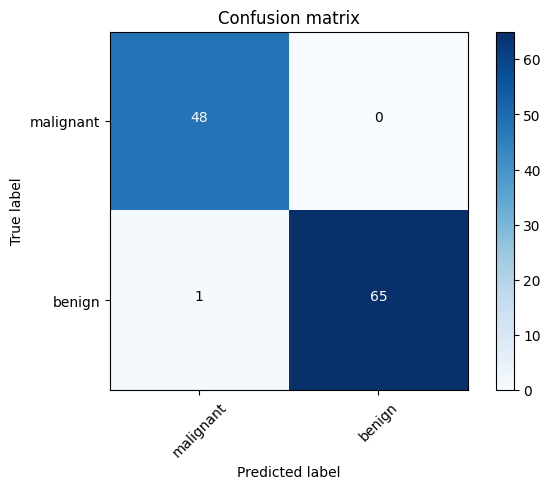

In [28]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("y_pred_shape:", y_pred.shape, "y_pred:", y_pred)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, cm_labels, normalize=False)#normalize=False or =True
plt.show()

# Bulk Testing and Modifying (hyperparameter results)

In [29]:
count = 1000 #used for looping and averaging results later

data = pd.read_csv('http://nrvis.com/data/mldata/breast-cancer-wisconsin_wdbc.csv')
X = data.iloc[:, 2:] #Gather all data from column index 2 and onward.
y = data.iloc[:, 1] #Gather data from column index 1.
cm_labels = ["malignant", "benign"]#labels for confusion matrix later
y = np.where(y=='M', 0, 1)#Where y=='M' set to 0(malignant), else 1(benign)

def doStartSTDNormalDist(X, y):
  X = (X - np.mean(X)) / np.std(X) #Standard Normal Distribution (mean 0, std 1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#Split
  return cm_labels, X_train, X_test, y_train, y_test

def doStartNormalized(X, y):
  X = (X - np.min(X)) / (np.max(X) - np.min(X)) #Normalization
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#Split
  return cm_labels, X_train, X_test, y_train, y_test

def doEnd(clf, cm_labels, X_train, X_test, y_train, y_test, a, index):
  clf.fit(X_train, y_train)#Train SVM Classifer
  y_pred = clf.predict(X_test)#Predict the response for test dataset
  a[index] = accuracy_score(y_test, y_pred)
  return a  #Model Accuracy: how often is the classifier correct?

In [30]:
def stdData(a, index):
  cm_labels, X_train, X_test, y_train, y_test = doStartSTDNormalDist(X, y)
  clf = svm.SVC() # Create SVM object
  a = doEnd(clf, cm_labels, X_train, X_test, y_train, y_test, a, index)
  return a

def normalizedData(a, index):
  cm_labels, X_train, X_test, y_train, y_test = doStartNormalized(X, y)
  clf = svm.SVC() # Create SVM object
  a = doEnd(clf, cm_labels, X_train, X_test, y_train, y_test, a, index)
  return a

In [31]:
index = 0
a = [0] * count
while (count > index):
  a = stdData(a, index)
  index += 1
print("STD Normal Dist:", np.mean(a))

index = 0
a = [0] * count
while (count > index):
  a = normalizedData(a, index)
  index += 1
print("Normalized:", np.mean(a))

#STD Normal Dist: 0.9745701754385964, 0.975, 0.975
#Normalized: 0.9768070175438595, 0.9756929824561402, 0.9766666666666665
#Over 3 runs of 1000 averaged samples...
#Normalized data is slightly more accurate when using the default regressor.

STD Normal Dist: 0.9742456140350877
Normalized: 0.9774649122807016


In [32]:
def doNormalizedDataWithKernel(a, index, kernelType):
  cm_labels, X_train, X_test, y_train, y_test = doStartNormalized(X, y)
  clf = svm.SVC(kernel=kernelType) # Create SVM object
  a = doEnd(clf, cm_labels, X_train, X_test, y_train, y_test, a, index)
  return a

In [33]:
index = 0
a = [0] * count
kernelType = 'linear'
while (count > index):
  a = doNormalizedDataWithKernel(a, index, kernelType)
  index += 1
print("Normalized Linear:", np.mean(a))

index = 0
a = [0] * count
kernelType = 'poly'
while (count > index):
  a = doNormalizedDataWithKernel(a, index, kernelType)
  index += 1
print("Normalized Polynomial:", np.mean(a))

index = 0
a = [0] * count
kernelType = 'rbf'
while (count > index):
  a = doNormalizedDataWithKernel(a, index, kernelType)
  index += 1
print("Normalized Radial Basis Function:", np.mean(a))

index = 0
a = [0] * count
kernelType = 'sigmoid'
while (count > index):
  a = doNormalizedDataWithKernel(a, index, kernelType)
  index += 1
print("Normalized Sigmoid:", np.mean(a))

#Normalized Linear: 0.9745087719298245, 0.9754824561403508, 0.9755175438596491
#Normalized Polynomial: 0.972219298245614, 0.972780701754386, 0.9724122807017543
#Normalized Radial Basis Function: 0.9772017543859648, 0.9765263157894736, 0.9763070175438595
#Normalized Sigmoid: 0.3003157894736842, 0.2992456140350877, 0.3009473684210526
#Over 3 runs of 1000 averaged samples...
#RBF is consistantly the most accurate with Linear and Polynomial close behind.
#The Sigmoid kernel is quite inaccurate.

Normalized Linear: 0.9748859649122805
Normalized Polynomial: 0.9728859649122806
Normalized Radial Basis Function: 0.9762192982456139
Normalized Sigmoid: 0.30090350877192984


In [34]:
def doNormalizedDataRBFWithC(a, index, kernelType, c):
  cm_labels, X_train, X_test, y_train, y_test = doStartNormalized(X, y)
  clf = svm.SVC(C=c, kernel=kernelType) # Create SVM object
  a = doEnd(clf, cm_labels, X_train, X_test, y_train, y_test, a, index)
  return a

In [35]:
kernelType = 'rbf'

index = 0
a = [0] * count
c = 0.0001
while (count > index):
  a = doNormalizedDataRBFWithC(a, index, kernelType, c)
  index += 1
print("Normalized RBF C=0.0001:", np.mean(a))

index = 0
a = [0] * count
c = 0.001
while (count > index):
  a = doNormalizedDataRBFWithC(a, index, kernelType, c)
  index += 1
print("Normalized RBF C=0.001:", np.mean(a))

index = 0
a = [0] * count
c = 0.01
while (count > index):
  a = doNormalizedDataRBFWithC(a, index, kernelType, c)
  index += 1
print("Normalized RBF C=0.01:", np.mean(a))

index = 0
a = [0] * count
c = 0.1
while (count > index):
  a = doNormalizedDataRBFWithC(a, index, kernelType, c)
  index += 1
print("Normalized RBF C=0.1:", np.mean(a))

index = 0
a = [0] * count
c = 1
while (count > index):
  a = doNormalizedDataRBFWithC(a, index, kernelType, c)
  index += 1
print("Normalized RBF C=1:", np.mean(a))

index = 0
a = [0] * count
c = 10
while (count > index):
  a = doNormalizedDataRBFWithC(a, index, kernelType, c)
  index += 1
print("Normalized RBF C=10:", np.mean(a))

index = 0
a = [0] * count
c = 100
while (count > index):
  a = doNormalizedDataRBFWithC(a, index, kernelType, c)
  index += 1
print("Normalized RBF C=100:", np.mean(a))

#Normalized RBF C=0.0001: 0.629, 0.6261491228070175, 0.6282543859649122
#Normalized RBF C=0.001: 0.6266315789473683, 0.6262543859649123, 0.625561403508772
#Normalized RBF C=0.01: 0.6982719298245614, 0.6988070175438598, 0.6953947368421052
#Normalized RBF C=0.1: 0.9517192982456141, 0.9510438596491229, 0.9508596491228073
#Normalized RBF C=1: 0.9769385964912279, 0.9764736842105263, 0.9768947368421051
#Normalized RBF C=10: 0.9762017543859648, 0.9772192982456139, 0.9780701754385964
#Normalized RBF C=100: 0.9620614035087719, 0.9619035087719299, 0.962078947368421
#Over 3 runs of 1000 averaged samples...
#C=1 and C=10 provided the best accuracy, C=10 slightly moreso.

Normalized RBF C=0.0001: 0.6263508771929824
Normalized RBF C=0.001: 0.6284649122807018
Normalized RBF C=0.01: 0.6952807017543859
Normalized RBF C=0.1: 0.9500701754385966
Normalized RBF C=1: 0.9774561403508771
Normalized RBF C=10: 0.9770438596491227
Normalized RBF C=100: 0.9621491228070177


# Hyperparameter Results condensed

In [36]:
#STD Normal Dist: 0.9745701754385964, 0.975, 0.975
#Normalized: 0.9768070175438595, 0.9756929824561402, 0.9766666666666665
#Over 3 runs of 1000 averaged samples...
#Normalized data is slightly more accurate when using the default regressor.

#Normalized Linear: 0.9745087719298245, 0.9754824561403508, 0.9755175438596491
#Normalized Polynomial: 0.972219298245614, 0.972780701754386, 0.9724122807017543
#Normalized Radial Basis Function: 0.9772017543859648, 0.9765263157894736, 0.9763070175438595
#Normalized Sigmoid: 0.3003157894736842, 0.2992456140350877, 0.3009473684210526
#Over 3 runs of 1000 averaged samples...
#RBF is consistantly the most accurate with Linear and Polynomial close behind.
#The Sigmoid kernel is quite inaccurate.

#Normalized RBF C=0.0001: 0.629, 0.6261491228070175, 0.6282543859649122
#Normalized RBF C=0.001: 0.6266315789473683, 0.6262543859649123, 0.625561403508772
#Normalized RBF C=0.01: 0.6982719298245614, 0.6988070175438598, 0.6953947368421052
#Normalized RBF C=0.1: 0.9517192982456141, 0.9510438596491229, 0.9508596491228073
#Normalized RBF C=1: 0.9769385964912279, 0.9764736842105263, 0.9768947368421051
#Normalized RBF C=10: 0.9762017543859648, 0.9772192982456139, 0.9780701754385964
#Normalized RBF C=100: 0.9620614035087719, 0.9619035087719299, 0.962078947368421
#Over 3 runs of 1000 averaged samples...
#C=1 and C=10 provided the best accuracy, C=10 slightly moreso.

# Notes and scrapped code, ignore

In [37]:
"""
a) Try out different scaling methods and write its impact on the accuracy: 
Normalization and Normal distribution scaling.
b) With the best scaling, try out different SVM kernels: linear, poly 
(polynomial), rbf (radial basis function), and sigmoid.
c) With the best fit kernel, change the value of C in the cases to get the 
best result (start from 0.0001 and go until 100 in a step of 10x)."""

#svm.l1_min_c(X, y, loss='squared_hinge', fit_intercept=True,
#             intercept_scaling=1.0)

#svm.LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0,
#              multi_class='ovr', fit_intercept=True, intercept_scaling=1,
#              class_weight=None, verbose=0, random_state=None, max_iter=1000)

#svm.LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive',
#              fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=0,
#              random_state=None, max_iter=1000)

#svm.NuSVC(nu=0.5, kernel='rbf', degree=3, gamma='scale', coef0=0.0,
#          shrinking=True, probability=False, tol=0.001, cache_size=200,
#          class_weight=None, verbose=False, max_iter=-1,
#          decision_function_shape='ovr', break_ties=False, random_state=None)

#svm.NuSVR(nu=0.5, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0,
#          shrinking=True, tol=0.001, cache_size=200, verbose=False, max_iter=-1)

#svm.OneClassSVM(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001,
#                nu=0.5, shrinking=True, cache_size=200, verbose=False,
#                max_iter=-1)

#svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True,
#        probability=False, tol=0.001, cache_size=200, class_weight=None,
#        verbose=False, max_iter=-1, decision_function_shape='ovr',
#        break_ties=False, random_state=None)
"""For large datasets consider using sklearn.svm.LinearSVC or 
sklearn.linear_model.SGDClassifier instead, possibly after a
sklearn.kernel_approximation.Nystroem transformer."""

#svm.SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0,
#        epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
"""For large datasets consider using sklearn.svm.LinearSVR or
sklearn.linear_model.SGDRegressor instead, possibly after a
sklearn.kernel_approximation.Nystroem transformer."""

#from sklearn import svm
#from sklearn.linear_model import SGDClassifier
#from sklearn.linear_model import SGDRegressor
#from sklearn.linear_model.SGDClassifier
#from sklearn.linear_model.SGDRegressor
#from sklearn.kernel_approximation

#svm.SVC                                        #This is the one I want to use
"""
kernel : string, optional (default='rbf')
  Specifies the kernel type to be used in the algorithm.
It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
a callable.
If none is given, 'rbf' will be used. If a callable is given it is
used to pre-compute the kernel matrix from data matrices; that matrix
should be an array of shape (n_samples, n_samples)."""
"""
C : float, optional (default=1.0)
    Regularization parameter. The strength of the regularization is
inversely proportional to C. Must be strictly positive. The penalty
is a squared l2 penalty."""

#SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001,
#              l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001,
#              shuffle=True, verbose=0, epsilon=DEFAULT_EPSILON, n_jobs=None,
#              random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5,
#              early_stopping=False, validation_fraction=0.1, n_iter_no_change=5,
#              class_weight=None, warm_start=False, average=False)
#SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001, l1_ratio=0.15,
#             fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True,
#             verbose=0, epsilon=DEFAULT_EPSILON, random_state=None,
#             learning_rate='invscaling', eta0=0.01, power_t=0.25,
#             early_stopping=False, validation_fraction=0.1, n_iter_no_change=5,
#             warm_start=False, average=False)

'\nC : float, optional (default=1.0)\n    Regularization parameter. The strength of the regularization is\ninversely proportional to C. Must be strictly positive. The penalty\nis a squared l2 penalty.'

In [38]:
#def doEndNormalizeTrue(clf, cm_labels, X_train, X_test, y_train, y_test, a, index):
#  clf.fit(X_train, y_train)#Train Logistic Regression Classifer
#  y_pred = clf.predict(X_test)#Predict the response for test dataset
#  #Model Accuracy: how often is the classifier correct?
#  a[index] = accuracy_score(y_test, y_pred)
#  return a
#  print("Accuracy:", accuracy_score(y_test, y_pred))
#  cm = confusion_matrix(y_test, y_pred)
#  plot_confusion_matrix(cm, cm_labels, normalize=True)#normalize=False or =True
#  plt.show()
#def stdTrue(a, index):
#  cm_labels, X_train, X_test, y_train, y_test = doStartSTDNormalDist(X, y)
#  clf = svm.SVC() # Create Logistic Regression object
#  a = doEndNormalizeTrue(clf, cm_labels, X_train, X_test, y_train, y_test, a, index)
#  return a
#index = 0
#a = [0] * count
#while (count > index):
#  a = stdTrue(a, index)
#  index += 1
#print("STD Normal Dist:", np.mean(a))